## Week 10: Image Analysis

> ### Application: Grain Size Measurement

#### Load packages

> First make sure you have cv2 installed.  Go to the anaconda power shell and run the following command: pip install opencv-contrib-python 

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage
from skimage import io, color, measure
import pandas as pd

from PIL import Image
from IPython.display import display

from pathlib import Path

#### Read image file. 
>Let's take a look at what data is contained in an image file.  We need this to better understand the steps below.  We will look at two types of images.  One is an RGB color image and the other is a grayscale image.  

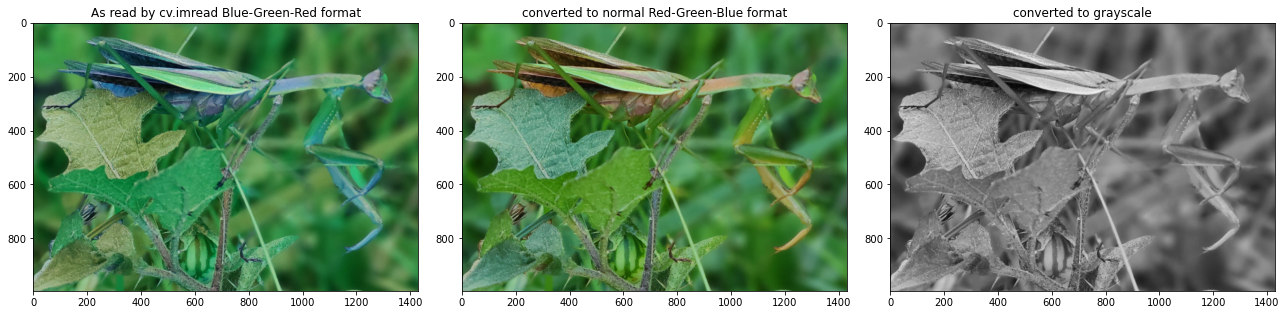

In [2]:
# if the image file is not in the same directory as this notebook then you will need the following:
# path=Path("../../images")
# filename="praying mantis small.jpg"
# fullpath=path / filename  #this is an object rather than string.  cv.imread needs a string so use str(fullpath)

img_cvread=cv.imread('praying mantis small.jpg')
img_rgb=cv.cvtColor(img_cvread,cv.COLOR_BGR2RGB)
img_gray=cv.cvtColor(img_rgb,cv.COLOR_RGB2GRAY) #move img to gray scale

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(18, 10))
ax1.imshow(img_cvread)
#ax2.imshow(img_rgb[0:400, 1000:1400])
ax2.imshow(img_rgb)
ax3.imshow(img_gray, cmap='gray')
ax1.set_title('As read by cv.imread Blue-Green-Red format')
ax2.set_title('converted to normal Red-Green-Blue format')
ax3.set_title('converted to grayscale')
plt.tight_layout()

In [3]:
print(img_rgb.shape) # rows, columns, depth
print(img_rgb[10, 0:5])  #look at row 10, points 0 through 5
print('grayscale')
print(img_gray.shape) # rows, columns, (depth=1) so it isn't given here
print(img_gray[10, 0:5])  #look at row 10, points 0 through 5

(996, 1430, 3)
[[ 60 121  52]
 [ 63 124  55]
 [ 64 125  56]
 [ 62 123  54]
 [ 62 125  55]]
grayscale
(996, 1430)
[95 98 99 97 98]


#### Read image and apply filters
> 1. Pyramid Mean Shift Filtering  
> 2. Gaussian Blur

***We want to remove background noise in our original image, flatten out the image color, and provide some smoothing.***  

In [4]:
#img = cv.imread("grains callister.png")
#img=img[8:270, 10:230]
img=cv.imread('GrainSizeAnalysis.jpg')
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_shift=cv.pyrMeanShiftFiltering(img, 21, 41)  #acts on original image

gray=cv.cvtColor(img_shift,cv.COLOR_BGR2GRAY) #move img to gray scale
blur=cv.GaussianBlur(gray,(3,3),0) # acts on gray scale image

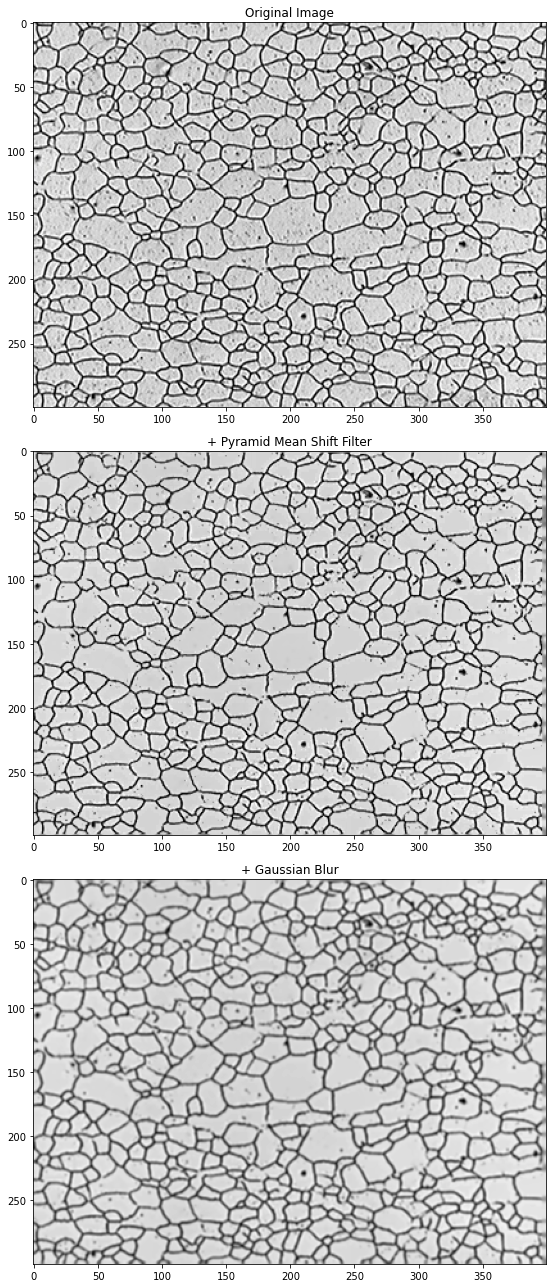

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1,figsize=(8, 18))
ax1.imshow(img)
ax2.imshow(gray, cmap='gray')
ax3.imshow(blur, cmap='gray')
ax1.set_title('Original Image')
ax2.set_title('+ Pyramid Mean Shift Filter')
ax3.set_title('+ Gaussian Blur')
plt.tight_layout()

#### Now threshold our image to black (0) & white (255) 

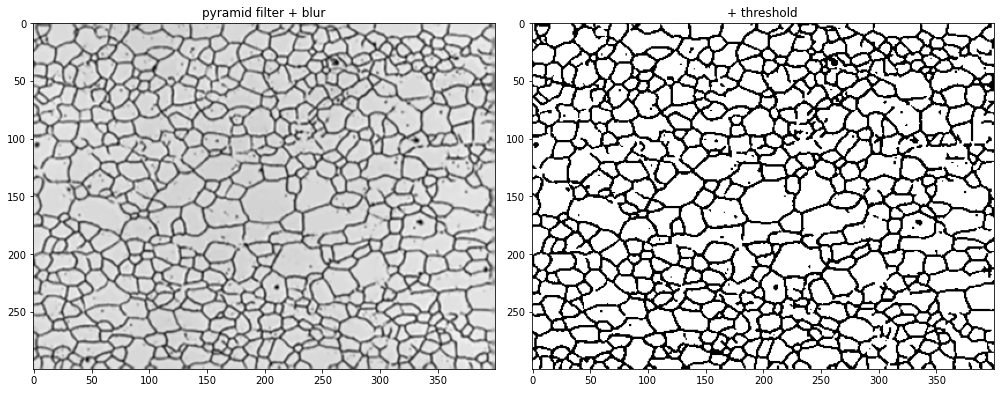

In [6]:
image_to_threshold=blur

#************** 3 choices here for performing threshold *********************
ret, thresh = cv.threshold(image_to_threshold,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
#thresh= cv.adaptiveThreshold(image_to_threshold, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY, 7, 11)
#thresh = cv.adaptiveThreshold(image_to_threshold,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,7,6) # notice using gray here not img

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(14, 7))
ax1.imshow(blur, cmap='gray')
ax2.imshow(thresh, cmap='gray')
ax1.set_title('pyramid filter + blur')
ax2.set_title('+ threshold')

plt.tight_layout()

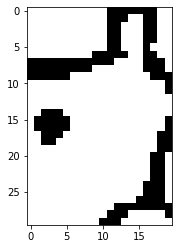

In [7]:
plt.imshow(thresh[90:120, 0:20], cmap="gray");

In [8]:
pd.DataFrame(thresh).iloc[90:120, 0:20] #255 = white, 0 = black

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
90   255  255  255  255  255  255  255  255  255  255  255    0    0    0   
91   255  255  255  255  255  255  255  255  255  255  255    0    0    0   
92   255  255  255  255  255  255  255  255  255  255  255    0    0  255   
93   255  255  255  255  255  255  255  255  255  255  255    0    0  255   
94   255  255  255  255  255  255  255  255  255  255  255    0    0  255   
95   255  255  255  255  255  255  255  255  255  255  255    0    0  255   
96   255  255  255  255  255  255  255  255  255    0    0    0    0    0   
97     0    0    0    0    0    0    0    0    0    0    0    0  255  255   
98     0    0    0    0    0    0    0    0    0  255  255  255  255  255   
99     0    0    0    0    0    0  255  255  255  255  255  255  255  255   
100  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
101  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
102  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
103  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
104  255  255    0    0    0  255  255  255  255  255  255  255  255  255   
105  255    0    0    0    0    0  255  255  255  255  255  255  255  255   
106  255    0    0    0    0    0  255  255  255  255  255  255  255  255   
107  255  255    0    0    0  255  255  255  255  255  255  255  255  255   
108  255  255    0    0  255  255  255  255  255  255  255  255  255  255   
109  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
110  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
111  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
112  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
113  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
114  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
115  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
116  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
117  255  255  255  255  255  255  255  255  255  255  255  255    0    0   
118  255  255  255  255  255  255  255  255  255  255  255    0    0    0   
119  255  255  255  255  255  255  255  255  255  255    0    0    0  255   

      14   15   16   17   18   19  
90     0    0    0    0  255  255  
91   255  255    0    0  255  255  
92   255  255    0    0  255  255  
93   255  255    0    0  255  255  
94   255  255    0    0  255  255  
95   255  255    0  255  255  255  
96   255  255    0    0  255  255  
97   255  255    0    0    0  255  
98   255  255    0    0    0  255  
99   255  255  255    0    0    0  
100  255  255  255  255  255    0  
101  255  255  255  255  255    0  
102  255  255  255  255  255  255  
103  255  255  255  255  255  255  
104  255  255  255  255  255  255  
105  255  255  255  255  255    0  
106  255  255  255  255  255    0  
107  255  255  255  255    0    0  
108  255  255  255  255    0    0  
109  255  255  255  255    0    0  
110  255  255  255    0    0  255  
111  255  255  255    0    0  255  
112  255  255  255    0    0  255  
113  255  255  255    0    0  255  
114  255  255    0    0    0  255  
115  255  255    0    0    0  255  
116  255    0    0    0    0  255  
117    0    0    0    0    0    0  
118  255  255  255  255  255    0  
119  255  255  255  255  255  255

#### Now define a few images we  need to apply our watershed routine. 

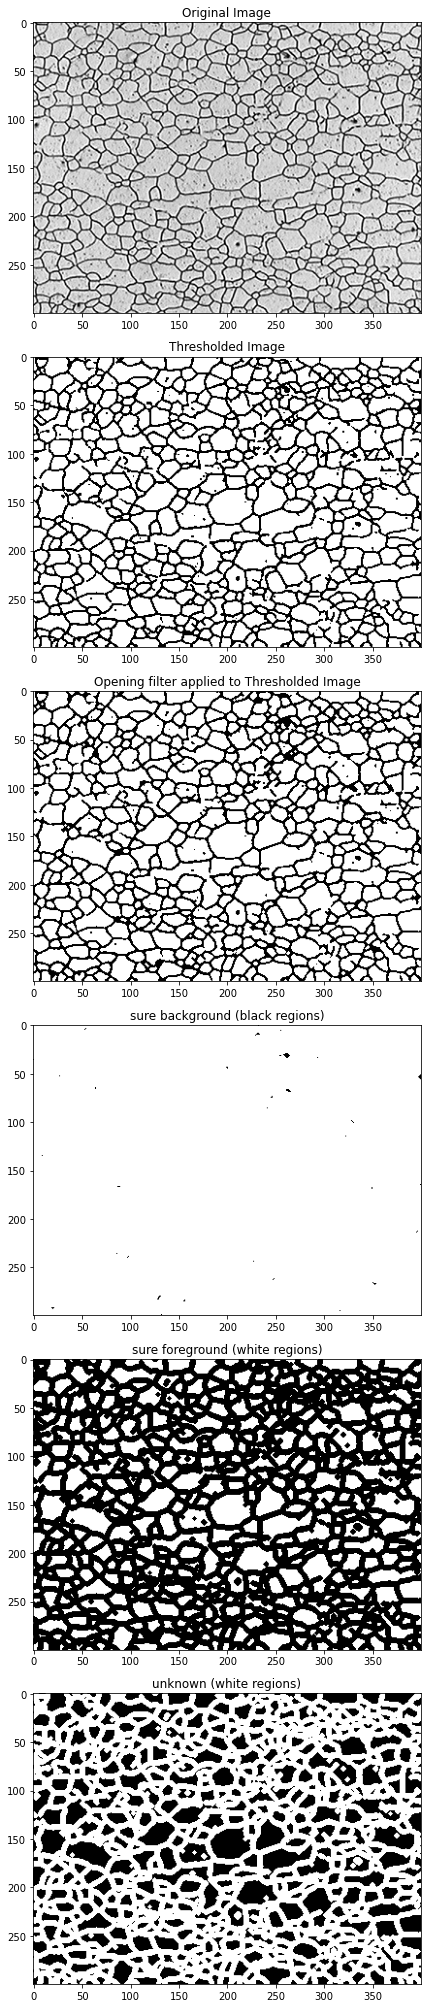

In [9]:
#kernel=cv.getStructuringElement(cv.MORPH_CROSS,(3,3))
kernel=cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
# kernel=cv.getStructuringElement(cv.MORPH_RECT,(3,3))

# noise removal
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations=1)

# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
sure_fg = cv.erode(opening,kernel,iterations=2)

# Finding unknown region
unknown = cv.subtract(sure_bg,sure_fg)


# ******************* Display results of each step ********************

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=6, ncols=1,figsize=(8, 28))
ax1.imshow(img, cmap='gray')
ax2.imshow(thresh, cmap='gray')
ax3.imshow(opening, cmap='gray')
ax4.imshow(sure_bg, cmap='gray')
ax5.imshow(sure_fg, cmap='gray')
ax6.imshow(unknown, cmap='gray')

ax1.set_title('Original Image')
ax2.set_title('Thresholded Image')
ax3.set_title('Opening filter applied to Thresholded Image')
ax4.set_title('sure background (black regions)')
ax5.set_title('sure foreground (white regions)')
ax6.set_title('unknown (white regions)')
plt.tight_layout()

#### Label groups of connected pixels with integers (labels)

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
100    0    0    0    0    0    0    0    0    0  197  197  197  197  197   
101    0    0    0    0    0    0  197  197  197  197  197  197  197  197   
102  212  212    0    0    0  197  197  197  197  197  197  197  197  197   
103  212    0    0    0    0    0  197  197  197  197  197  197  197  197   
104    0    0    0    0    0    0    0  197  197  197  197  197  197  197   
105    0    0    0    0    0    0    0    0  197  197  197  197  197  197   
106    0    0    0    0    0    0    0    0  197  197  197  197  197  197   
107    0    0    0    0    0    0    0  197  197  197  197  197  197  197   
108    0    0    0    0    0    0  197  197  197  197  197  197  197  197   
109  197    0    0    0    0  197  197  197  197  197  197  197  197  197   
110  197  197    0    0  197  197  197  197  197  197  197  197  197  197   
111  197  197  197  197  197  197  197  197  197  197  197  197  197  197   
112  197  197  197  197  197  197  197  197  197  197  197  197  197  197   
113  197  197  197  197  197  197  197  197  197  197  197  197  197  197   
114  197  197  197  197  197  197  197  197  197  197  197  197  197  197   
115  197  197  197  197  197  197  197  197  197  197  197  197    0    0   
116  197  197  197  197  197  197  197  197  197  197  197    0    0    0   
117  197  197  197  197  197  197  197  197  197  197    0    0    0    0   
118  197  197  197  197  197  197  197  197  197    0    0    0    0    0   
119  197  197  197  197  197  197  197  197    0    0    0    0    0    0   

      14   15   16   17  18  19  
100  197  197    0    0   0   0  
101  197  197  197    0   0   0  
102  197  197  197  197   0   0  
103  197  197  197  197   0   0  
104  197  197  197  197   0   0  
105  197  197  197    0   0   0  
106  197  197  197    0   0   0  
107  197  197    0    0   0   0  
108  197  197    0    0   0   0  
109  197  197    0    0   0   0  
110  197    0    0    0   0   0  
111  197    0    0    0   0   0  
112  197    0    0    0   0   0  
113  197    0    0    0   0   0  
114    0    0    0    0   0   0  
115    0    0    0    0   0   0  
116    0    0    0    0   0   0  
117    0    0    0    0   0   0  
118    0    0    0    0   0   0  
119    0    0    0    0   0   0

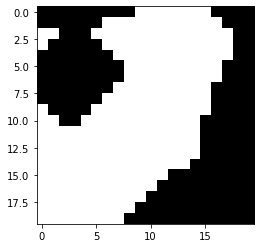

In [10]:
# Marker labelling
# cv2.connectedComponents(). labels background of the image with 0, 
#then other objects are labelled with integers starting from 1.
ret, markers = cv.connectedComponents(sure_fg)

plt.imshow(sure_fg[100:120, 0:20], cmap="gray");
pd.DataFrame(markers).iloc[100:120, 0:20]

#### Keep our markers but change the "unknown" reagions to value 0
>The watershed routine will "fill" these 0 regions with different color water starting from the cluster labels.  Where the water intersects, defines the boundary.  The boundary is set to a value of -1 and colored red.  

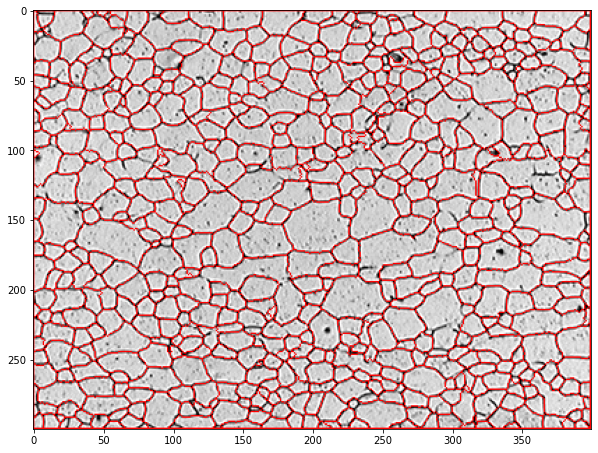

In [11]:
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv.watershed(img,markers)  # img needs shape (pix, pix, 3), markers is (pix, pix)
img[markers ==-1] = [255,0,0]

#display(Image.fromarray(markers))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111) # 1x1 grid, first subplot

ax.imshow(img)

plt.show()


In [12]:
pd.DataFrame(markers).iloc[100:120, 0:20]

0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
100  -1   -1  198  198  198  198  198  198  198  198  198  198  198  198  198   
101  -1  213   -1   -1  198  198  198  198  198  198  198  198  198  198  198   
102  -1  213  213  213   -1  198  198  198  198  198  198  198  198  198  198   
103  -1  213  213   -1  198  198  198  198  198  198  198  198  198  198  198   
104  -1  213   -1  198  198  198  198  198  198  198  198  198  198  198  198   
105  -1   -1  198  198  198  198  198  198  198  198  198  198  198  198  198   
106  -1  198  198  198  198  198  198  198  198  198  198  198  198  198  198   
107  -1  198  198  198  198  198  198  198  198  198  198  198  198  198  198   
108  -1  198  198  198  198  198  198  198  198  198  198  198  198  198  198   
109  -1  198  198  198  198  198  198  198  198  198  198  198  198  198  198   
110  -1  198  198  198  198  198  198  198  198  198  198  198  198  198  198   
111  -1  198  198  198  198  198  198  198  198  198  198  198  198  198  198   
112  -1  198  198  198  198  198  198  198  198  198  198  198  198  198  198   
113  -1  198  198  198  198  198  198  198  198  198  198  198  198  198  198   
114  -1  198  198  198  198  198  198  198  198  198  198  198  198  198  198   
115  -1  198  198  198  198  198  198  198  198  198  198  198  198  198  198   
116  -1  198  198  198  198  198  198  198  198  198  198  198  198  198   -1   
117  -1  198  198  198  198  198  198  198  198  198  198  198   -1   -1  239   
118  -1  198  198  198  198  198  198  198  198  198  198   -1  239  239  239   
119  -1  198  198  198  198  198  198  198  198  198   -1  239  239  239  239   

      15   16   17   18   19  
100  198  198  198  198  198  
101  198  198  198  198  198  
102  198  198  198  198  198  
103  198  198  198  198  198  
104  198  198  198  198  198  
105  198  198  198  198   -1  
106  198  198  198  198   -1  
107  198  198  198  198   -1  
108  198  198  198   -1  219  
109  198  198  198   -1  219  
110  198  198  198   -1  219  
111  198  198  198   -1  219  
112  198  198  198   -1  219  
113  198  198   -1  219  219  
114  198  198   -1  219  219  
115  198   -1   -1  219  219  
116   -1  239  239   -1  219  
117  239  239  239  239   -1  
118  239  239  239  239  239  
119  239  239  239  239  239

#### Change the marker labels to colors and combine with the original image

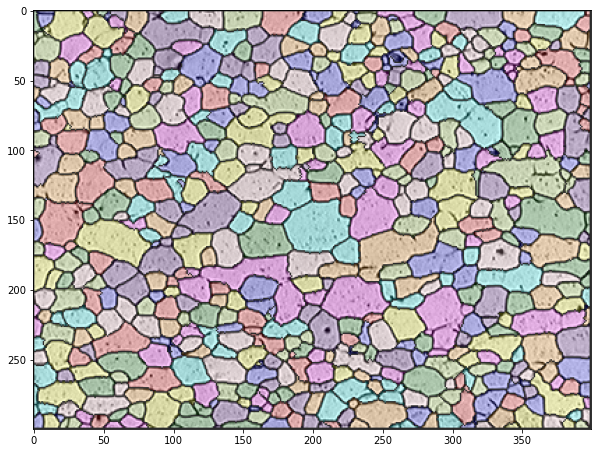

In [12]:
img2=color.label2rgb(markers, image=img, bg_label=-1, alpha=0.2)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111) # 1x1 grid, first subplot
ax.imshow(img2);
plt.show()

#### Each colored grain can now be analyzed and placed in a Pandas DataFrame

In [13]:
pixels_to_μm=0.9  # μm per pixel
propList=['label','area','equivalent_diameter','orientation','major_axis_length', 'minor_axis_length','perimeter']
#propList=['equivalent_diameter','orientation','area','major_axis_length']
props=measure.regionprops_table(markers, properties=propList)

grain_data=pd.DataFrame(props)

grain_data.head()

label  area  equivalent_diameter  orientation  major_axis_length  \
0      1   663            29.054394    -0.627600         452.265550   
1      2   440            23.669081    -1.235222          30.250337   
2      3    23             5.411516     1.337246           6.658010   
3      4    14             4.222008     1.530070           5.781092   
4      5    43             7.399277     1.249291          11.999135   

   minor_axis_length   perimeter  
0         314.584636  452.410209  
1          18.966669   84.597980  
2           4.562920   16.278175  
3           3.654380   12.035534  
4           5.576276   26.863961

Recall the grain size number from Callister was defined as $n=2^{G-1}$ where $n$ is the number of grains in a $1 in^2$ area at 100x and $G$ is the grain size number.  This equation could be rewritten for, $n^*$, the number of grains per $mm^2$ at no magnification.  This would be $$G = 3.322 Log(n^*)-2.9543$$

In [14]:
avg_grain_diam=(grain_data.loc[:,'equivalent_diameter'].mean()*pixels_to_μm)
print(f'Avg. Grain Diameter = {avg_grain_diam:0.2f} μm')

avg_grain_area= grain_data.loc[:,'area'].mean()*pixels_to_μm**2 #μm^2
print(f'Avg. Grain Area = {avg_grain_area:0.2f} μm^2')
n= (avg_grain_area*10**-6)**-1 # grains per mm^2
print(f'Number of grains per mm^2 = {n:0.2f}')

# Grain Size number 
print(f'Grain Size number = {3.322*np.log10(n)-2.9543:0.2f}')

Avg. Grain Diameter = 12.90 μm
Avg. Grain Area = 157.96 μm^2
Number of grains per mm^2 = 6330.52
Grain Size number = 9.67


## Homework

**1.  Pick one of the following images and find the grain size number.**  
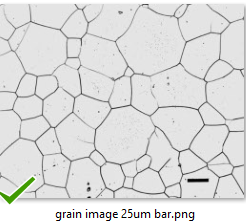
The above image can be used to get the number of pixels that equals 25 microns (black bar at bottom right).  The image below is to analyze. I removed the micron bar so it didn't affect the watershed.  
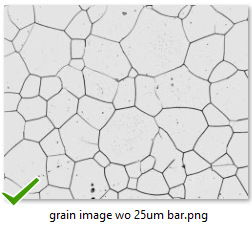
The image below has enough grains that you can just crop the micron bar out of the image and analyze the remaining grains.  
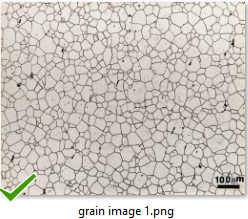
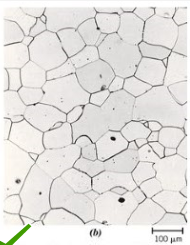

**2.  For Extra Credit and a challenge:**  Determine the fraction of proeutectoid ferrite (white regions) in this image.  The remaining areas (darker colors) is pearlite. 
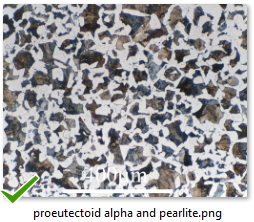